In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [7]:
data1=pd.read_csv('Building_Permits.csv')
data1.head(2)
# os.getcwd()

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718


In [3]:
null_value=data.isnull().mean()*100
drop_col=data.drop(columns=null_value[null_value>25].keys())
drop_col.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,...,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,...,2.0,3.0,constr type 3,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,...,2.0,1.0,constr type 1,1.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,...,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,...,2.0,3.0,constr type 3,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [4]:
for i in drop_col.columns:
    print(i)

Permit Number
Permit Type
Permit Type Definition
Permit Creation Date
Block
Lot
Street Number
Street Name
Street Suffix
Description
Current Status
Current Status Date
Filed Date
Issued Date
First Construction Document Date
Number of Existing Stories
Number of Proposed Stories
Estimated Cost
Revised Cost
Existing Use
Proposed Use
Plansets
Existing Construction Type
Existing Construction Type Description
Proposed Construction Type
Proposed Construction Type Description
Supervisor District
Neighborhoods - Analysis Boundaries
Zipcode
Location
Record ID


In [5]:
num_var=drop_col.select_dtypes(include=['int64','float64'])
num_var.head()

,Permit Type,Street Number,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
0,4,140,6.0,NaN,4000.0,4000.0,2.0,3.0,NaN,3.0,94102.0,1380611233945
1,4,440,7.0,NaN,1.0,500.0,2.0,3.0,NaN,3.0,94102.0,1420164406718
2,3,1647,6.0,6.0,20000.0,NaN,2.0,1.0,1.0,3.0,94109.0,1424856504716
3,8,1230,2.0,2.0,2000.0,2000.0,2.0,5.0,5.0,3.0,94109.0,1443574295566
4,6,950,3.0,NaN,100000.0,100000.0,2.0,3.0,NaN,6.0,94102.0,144548169992


In [6]:
cat_var=drop_col.select_dtypes(include=['O'])
cat_var.head()

,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Existing Use,Proposed Use,Existing Construction Type Description,Proposed Construction Type Description,Neighborhoods - Analysis Boundaries,Location
0,201505065519,sign - erect,05/06/2015,0326,023,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,tourist hotel/motel,NaN,constr type 3,NaN,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,201604195146,sign - erect,04/19/2016,0306,007,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,tourist hotel/motel,NaN,constr type 3,NaN,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,201605278609,additions alterations or repairs,05/27/2016,0595,203,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,retail sales,retail sales,constr type 1,constr type 1,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,201611072166,otc alterations permit,11/07/2016,0156,011,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,1 family dwelling,1 family dwelling,wood frame (5),wood frame (5),Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,201611283529,demolitions,11/28/2016,0342,001,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,retail sales,NaN,constr type 3,NaN,Tenderloin,"(37.78315261897309, -122.40950883997789)"


In [7]:
print('shape of the num_var :-',num_var.shape)
print('shape of the cat_var :-',cat_var.shape)
print('shape of the dataset :-',drop_col.shape)

shape of the num_var :- (198900, 12)
shape of the cat_var :- (198900, 19)
shape of the dataset :- (198900, 31)


## find out the missing columns in num_var & cat_var

In [8]:
num_missing_col=[var for var in num_var.columns if num_var[var].isnull().sum()>0]
num_missing_col

['Number of Existing Stories',
 'Number of Proposed Stories',
 'Estimated Cost',
 'Revised Cost',
 'Plansets',
 'Existing Construction Type',
 'Proposed Construction Type',
 'Supervisor District',
 'Zipcode']

In [9]:
cat_missing_col=[var for var in cat_var.columns if cat_var[var].isnull().sum()>0]
cat_missing_col

['Street Suffix',
 'Description',
 'Issued Date',
 'First Construction Document Date',
 'Existing Use',
 'Proposed Use',
 'Existing Construction Type Description',
 'Proposed Construction Type Description',
 'Neighborhoods - Analysis Boundaries',
 'Location']

In [10]:
print('shape of the num_var :-',num_var.shape)
print('shape of the cat_var :-',cat_var.shape)
# print('shape of the dataset :-',drop_col.shape)
print()
print('size of numerical missing columns :-',len(num_missing_col))
print('size of categorical missing columns :-',len(cat_missing_col))

shape of the num_var :- (198900, 12)
shape of the cat_var :- (198900, 19)

size of numerical missing columns :- 9
size of categorical missing columns :- 10


## percentage of numerical & categorical missing columns

In [11]:
drop_col[num_missing_col].isnull().mean()*100

Number of Existing Stories    21.510307
Number of Proposed Stories    21.552539
Estimated Cost                19.138260
Revised Cost                   3.049774
Plansets                      18.757667
Existing Construction Type    21.802916
Proposed Construction Type    21.700352
Supervisor District            0.863248
Zipcode                        0.862745
dtype: float64

In [12]:
drop_col[cat_missing_col].isnull().mean()*100

Street Suffix                              1.391654
Description                                0.145802
Issued Date                                7.511312
First Construction Document Date           7.514329
Existing Use                              20.670689
Proposed Use                              21.336853
Existing Construction Type Description    21.802916
Proposed Construction Type Description    21.700352
Neighborhoods - Analysis Boundaries        0.867270
Location                                   0.854701
dtype: float64

# first we deal with the numerical columns
<b> numerical missing value imputation</b>

In [13]:
drop_col[num_missing_col].head()

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode
0,6.0,NaN,4000.0,4000.0,2.0,3.0,NaN,3.0,94102.0
1,7.0,NaN,1.0,500.0,2.0,3.0,NaN,3.0,94102.0
2,6.0,6.0,20000.0,NaN,2.0,1.0,1.0,3.0,94109.0
3,2.0,2.0,2000.0,2000.0,2.0,5.0,5.0,3.0,94109.0
4,3.0,NaN,100000.0,100000.0,2.0,3.0,NaN,6.0,94102.0


In [14]:
drop_col[cat_missing_col].head()

,Street Suffix,Description,Issued Date,First Construction Document Date,Existing Use,Proposed Use,Existing Construction Type Description,Proposed Construction Type Description,Neighborhoods - Analysis Boundaries,Location
0,St,"ground fl facade: to erect illuminated, electr...",11/09/2015,11/09/2015,tourist hotel/motel,NaN,constr type 3,NaN,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,St,remove (e) awning and associated signs.,08/03/2017,08/03/2017,tourist hotel/motel,NaN,constr type 3,NaN,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,Av,installation of separating wall,NaN,NaN,retail sales,retail sales,constr type 1,constr type 1,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,Av,repair dryrot & stucco at front of bldg.,07/18/2017,07/18/2017,1 family dwelling,1 family dwelling,wood frame (5),wood frame (5),Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,St,demolish retail/office/commercial 3-story buil...,12/01/2017,11/20/2017,retail sales,NaN,constr type 3,NaN,Tenderloin,"(37.78315261897309, -122.40950883997789)"


In [15]:
cat_var_notnull=[var for var in cat_var.columns if cat_var[var].isnull().sum()<=0]
cat_var_notnull

['Permit Number',
 'Permit Type Definition',
 'Permit Creation Date',
 'Block',
 'Lot',
 'Street Name',
 'Current Status',
 'Current Status Date',
 'Filed Date']

In [16]:
num_var_notnull=[var for var in num_var.columns if num_var[var].isnull().sum()<=0]
num_var_notnull

['Permit Type', 'Street Number', 'Record ID']

In [17]:
num_missing_col

['Number of Existing Stories',
 'Number of Proposed Stories',
 'Estimated Cost',
 'Revised Cost',
 'Plansets',
 'Existing Construction Type',
 'Proposed Construction Type',
 'Supervisor District',
 'Zipcode']

In [18]:
drop_col['Permit Type'].value_counts()

8    178844
3     14663
4      2892
2       950
6       600
7       511
1       349
5        91
Name: Permit Type, dtype: int64

In [19]:
drop_col['Street Number'].value_counts().head()

1      2394
101    1153
100    1143
50     1103
201    1026
Name: Street Number, dtype: int64

In [20]:
drop_col['Record ID'].value_counts().head()

1323096395930    1
1482389504717    1
1347422451402    1
1450109158125    1
1383685141713    1
Name: Record ID, dtype: int64

# i have numerical categorical column "permit type"
## so we wil fill the mean value by using all class of "permit type"

In [83]:
less_five=drop_col[num_missing_col].isnull().mean()*100
greater_five_col=less_five[less_five>5].keys()
greater_five_col
# five_lessnum_col=less_five[less_five>=15]
# greater_than_five=five_lessnum_col.keys()
# greater_than_five

Index(['Number of Existing Stories', 'Number of Proposed Stories',
       'Estimated Cost', 'Plansets', 'Existing Construction Type',
       'Proposed Construction Type'],
      dtype='object')

## now we will apply the median value

In [28]:
num_var.columns

Index(['Permit Type', 'Street Number', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Estimated Cost', 'Revised Cost',
       'Plansets', 'Existing Construction Type', 'Proposed Construction Type',
       'Supervisor District', 'Zipcode', 'Record ID'],
      dtype='object')

In [34]:
df_copy=data.copy()
num_list=['Permit Type', 'Street Number', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Estimated Cost', 'Revised Cost',
       'Plansets', 'Existing Construction Type', 'Proposed Construction Type',
       'Supervisor District', 'Zipcode', 'Record ID']
for num_variable in num_list:
    for class_var in num_var[num_variable].unique():


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-34-be53dc76815b>, line 8)

In [80]:
data2=data.copy()
for miss_col_less_than_five in less_five_col:
    for domain in data['Permit Type'].unique():
        data2.update(data[data.loc[:,'Permit Type']==domain][miss_col_less_than_five].replace(np.nan,data[data.loc[:,'Permit Type']==domain][miss_col_less_than_five].mean()))


In [81]:
data2[less_five_col].isnull().sum()

Revised Cost           0
Supervisor District    0
Zipcode                0
dtype: int64

In [110]:
greater_five_col

Index(['Number of Existing Stories', 'Number of Proposed Stories',
       'Estimated Cost', 'Plansets', 'Existing Construction Type',
       'Proposed Construction Type'],
      dtype='object')

## and now we will fill the median other numerical missing columns

In [137]:
num_null_col=data3.select_dtypes(include=['int64','float64']).isnull().sum()
miss_numerical_columns=num_null_col[num_null_col>0].keys()
miss_numerical_columns

Index(['Unit', 'Number of Existing Stories', 'Number of Proposed Stories',
       'Existing Units', 'Proposed Units', 'Existing Construction Type',
       'Proposed Construction Type'],
      dtype='object')

In [138]:
data4 = data3.copy()
for columns in miss_numerical_columns:
    for class_ver in data2['Permit Type'].unique():
        data4.update(data3[data3.loc[:,'Permit Type']==class_ver][columns].replace(np.nan,data3[data3.loc[:,'Permit Type']==class_ver][columns].mean()))


In [101]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# you can now check differences in dataframe


**untill missing values present there but we has reduced maximum 60% percentage value<br>
and in this method we used a single domain property so result is not coming perfect<br>
we have to use diffrent domain on a different column<br>
<p> our function is working perfectly but you remeber that<br>
    untill some missing  valuse are presented here because my function meet  the condition<br>
    and function calculate the mean or median value of that columns and after that calculation<br>
    function will put the value on these columns but when function have only none value <br>
    than what will do calculate the mean and medina etc.. hence no changes there</p>                                                         
                                                       
                                                         

In [148]:
data2[miss_numerical_columns].isnull().mean()*100

Unit                          85.178984
Number of Existing Stories    21.510307
Number of Proposed Stories    21.552539
Existing Units                25.911513
Proposed Units                25.596280
Existing Construction Type    21.802916
Proposed Construction Type    21.700352
dtype: float64

In [145]:
data3[miss_numerical_columns].isnull().mean()*100

Unit                          85.178984
Number of Existing Stories     0.221217
Number of Proposed Stories     2.058321
Existing Units                25.911513
Proposed Units                25.596280
Existing Construction Type     0.221217
Proposed Construction Type     2.058321
dtype: float64

In [144]:
data4[miss_numerical_columns].isnull().mean()*100

Unit                          0.000000
Number of Existing Stories    0.221217
Number of Proposed Stories    2.058321
Existing Units                0.221217
Proposed Units                2.058321
Existing Construction Type    0.221217
Proposed Construction Type    2.058321
dtype: float64

In [155]:
data4[data4[miss_numerical_columns].isnull().any(axis=1)].head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,56.806691,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.0,4.000000e+03,tourist hotel/motel,143.000000,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.000000,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.0,5.000000e+02,tourist hotel/motel,29.212831,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,0.045455,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.0,1.000000e+05,retail sales,1.140741,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
55,201710242043,7,wall or painted sign,10/24/2017,8702,611,274,NaN,King,St,88.943396,NaN,re-face (1) existing projecting sign. maher na,filed,10/24/2017,10/24/2017,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,1000.0,1.825654e+03,NaN,0.000000,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,6.0,Mission Bay,94107.0,"(37.777642220223974, -122.39341813656613)",1484475491468
83,201712207002,1,new construction,12/20/2017,4991,085,250,NaN,Executive Park,Bl,0.000000,NaN,bldg 7. erect a type i&iii (5) story (3) basem...,filed,12/20/2017,12/20/2017,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,25000000.0,5.374473e+07,NaN,NaN,apartments,74.0,2.0,NaN,NaN,NaN,1.0,constr type 1,Y,10.0,Bayview Hunters Point,94134.0,"(37.710262656811906, -122.39181337034003)",1491353177117


In [157]:
nam_var=data4.select_dtypes(include=['int64','float64']).keys()
nam_var

Index(['Permit Type', 'Street Number', 'Unit', 'Number of Existing Stories',
       'Number of Proposed Stories', 'Estimated Cost', 'Revised Cost',
       'Existing Units', 'Proposed Units', 'Plansets',
       'Existing Construction Type', 'Proposed Construction Type',
       'Supervisor District', 'Zipcode', 'Record ID'],
      dtype='object')

In [160]:
data4[nam_var].isnull().sum()

Permit Type                      0
Street Number                    0
Unit                             0
Number of Existing Stories     440
Number of Proposed Stories    4094
Estimated Cost                   0
Revised Cost                     0
Existing Units                 440
Proposed Units                4094
Plansets                         0
Existing Construction Type     440
Proposed Construction Type    4094
Supervisor District              0
Zipcode                          0
Record ID                        0
dtype: int64

In [33]:
data=pd.read_csv('prectise_data_save.csv')
data.head(2)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (23,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'first time fill mean & median value')

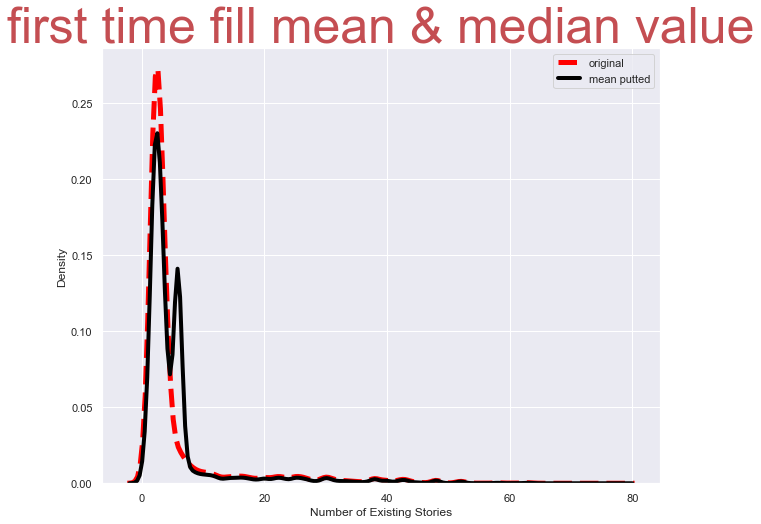

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(data1['Number of Existing Stories'],hist=False,label='original',kde_kws={'color':'red','lw':5,'linestyle':'dashed'})
sns.distplot(data['Number of Existing Stories'],hist=False,label='mean putted',kde_kws={'color':'black','lw':4,'linestyle':'solid'})
plt.legend()
plt.title('first time fill mean & median value',fontsize=50,color='r')

In [23]:
# and now we have just records missing so i am goint to remove these records that are containg missing record
num_var=data.select_dtypes(include=['int64','float64'])
num_var.isnull().mean()*100

Unnamed: 0                    0.000000
Permit Type                   0.000000
Street Number                 0.000000
Unit                          0.000000
Number of Existing Stories    0.221217
Number of Proposed Stories    2.058321
Estimated Cost                0.000000
Revised Cost                  0.000000
Existing Units                0.221217
Proposed Units                2.058321
Plansets                      0.000000
Existing Construction Type    0.221217
Proposed Construction Type    2.058321
Supervisor District           0.000000
Zipcode                       0.000000
Record ID                     0.000000
dtype: float64

In [27]:
data.select_dtypes(include=['int64','float64'])['Plansets'].dropna(inplace=True)
# num_free_missing_df=


<ipython-input-27-9b0555b46625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.select_dtypes(include=['int64','float64'])['Plansets'].dropna(inplace=True)


In [40]:
num_var2=num_var.dropna()


## numerical columns cleaned

In [43]:
print('shape of the cleaned numerical variable :=',num_var2.shape)
num_var2.isnull().sum()

shape of the cleaned numerical variable := (194457, 16)


Unnamed: 0                    0
Permit Type                   0
Street Number                 0
Unit                          0
Number of Existing Stories    0
Number of Proposed Stories    0
Estimated Cost                0
Revised Cost                  0
Existing Units                0
Proposed Units                0
Plansets                      0
Existing Construction Type    0
Proposed Construction Type    0
Supervisor District           0
Zipcode                       0
Record ID                     0
dtype: int64

# categorical data columns missing value imputation

In [102]:
# first we will remove that columns that containin 20% missing value in the dataframe
cat_var=data.select_dtypes(include=['O'])
null=cat_var.isnull().mean()*100
df=cat_var.drop(columns=null[null>20].keys())
df.isnull().mean()*100

Permit Number                          0.000000
Permit Type Definition                 0.000000
Permit Creation Date                   0.000000
Block                                  0.000000
Lot                                    0.000000
Street Name                            0.000000
Street Suffix                          1.391654
Description                            0.145802
Current Status                         0.000000
Current Status Date                    0.000000
Filed Date                             0.000000
Issued Date                            7.511312
First Construction Document Date       7.514329
Neighborhoods - Analysis Boundaries    0.867270
Location                               0.854701
dtype: float64

In [104]:
for columns in df.columns:
    df[columns].fillna(df[columns].mode()[0],inplace=True)

In [109]:
print(df.shape)
print(df.columns)
df.isnull().sum()
cat=df
cat

(198900, 15)
Index(['Permit Number', 'Permit Type Definition', 'Permit Creation Date',
       'Block', 'Lot', 'Street Name', 'Street Suffix', 'Description',
       'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date',
       'First Construction Document Date',
       'Neighborhoods - Analysis Boundaries', 'Location'],
      dtype='object')


,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Neighborhoods - Analysis Boundaries,Location
0,201505065519,sign - erect,05/06/2015,0326,023,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,201604195146,sign - erect,04/19/2016,0306,007,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,201605278609,additions alterations or repairs,05/27/2016,0595,203,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,06/15/2016,11/07/2016,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,201611072166,otc alterations permit,11/07/2016,0156,011,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,201611283529,demolitions,11/28/2016,0342,001,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,Tenderloin,"(37.78315261897309, -122.40950883997789)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,otc alterations permit,12/05/2017,0113,017A,Montgomery,St,street space,issued,12/05/2017,12/05/2017,12/05/2017,12/05/2017,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
198896,201712055595,otc alterations permit,12/05/2017,0271,014,Bush,St,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017,12/06/2017,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
198897,M863507,otc alterations permit,12/06/2017,4318,019,Indiana,St,street space,issued,12/06/2017,12/06/2017,12/06/2017,12/06/2017,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
198898,M863747,otc alterations permit,12/06/2017,0298,029,Sutter,St,street space permit,issued,12/06/2017,12/06/2017,12/06/2017,12/06/2017,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"


In [99]:
num_var2.isnull().sum()

Unnamed: 0                    0
Permit Type                   0
Street Number                 0
Unit                          0
Number of Existing Stories    0
Number of Proposed Stories    0
Estimated Cost                0
Revised Cost                  0
Existing Units                0
Proposed Units                0
Plansets                      0
Existing Construction Type    0
Proposed Construction Type    0
Supervisor District           0
Zipcode                       0
Record ID                     0
dtype: int64

In [110]:
print('shape of categorical cleaned dataset :-',cat.shape)
print('shape of Numerical cleaned dataset :-',num_var2.shape)

shape of categorical cleaned dataset :- (198900, 15)
shape of Numerical cleaned dataset :- (194457, 16)


In [147]:
print(nume.shape)

num=num_var2.iloc[0:194457,0:15]
num.isnull().sum()

(194457, 15)


Unnamed: 0                    0
Permit Type                   0
Street Number                 0
Unit                          0
Number of Existing Stories    0
Number of Proposed Stories    0
Estimated Cost                0
Revised Cost                  0
Existing Units                0
Proposed Units                0
Plansets                      0
Existing Construction Type    0
Proposed Construction Type    0
Supervisor District           0
Zipcode                       0
dtype: int64

In [151]:
print(cut.shape)
cut=df.iloc[0:194457,0:15]
cut.isnull().sum()
# cut.head()

(194457, 15)


Permit Number                          0
Permit Type Definition                 0
Permit Creation Date                   0
Block                                  0
Lot                                    0
Street Name                            0
Street Suffix                          0
Description                            0
Current Status                         0
Current Status Date                    0
Filed Date                             0
Issued Date                            0
First Construction Document Date       0
Neighborhoods - Analysis Boundaries    0
Location                               0
dtype: int64

# using SimpleImputer class missing value imputaion

In [169]:
cat=data1.select_dtypes(include=['O'])
cat.head()

,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number Suffix,Street Name,Street Suffix,Unit Suffix,Description,...,Fire Only Permit,Permit Expiration Date,Existing Use,Proposed Use,TIDF Compliance,Existing Construction Type Description,Proposed Construction Type Description,Site Permit,Neighborhoods - Analysis Boundaries,Location
0,201505065519,sign - erect,05/06/2015,0326,023,NaN,Ellis,St,NaN,"ground fl facade: to erect illuminated, electr...",...,NaN,11/03/2016,tourist hotel/motel,NaN,NaN,constr type 3,NaN,NaN,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,201604195146,sign - erect,04/19/2016,0306,007,NaN,Geary,St,NaN,remove (e) awning and associated signs.,...,NaN,12/03/2017,tourist hotel/motel,NaN,NaN,constr type 3,NaN,NaN,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,201605278609,additions alterations or repairs,05/27/2016,0595,203,NaN,Pacific,Av,NaN,installation of separating wall,...,NaN,NaN,retail sales,retail sales,NaN,constr type 1,constr type 1,NaN,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,201611072166,otc alterations permit,11/07/2016,0156,011,NaN,Pacific,Av,NaN,repair dryrot & stucco at front of bldg.,...,NaN,07/13/2018,1 family dwelling,1 family dwelling,NaN,wood frame (5),wood frame (5),NaN,Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,201611283529,demolitions,11/28/2016,0342,001,NaN,Market,St,NaN,demolish retail/office/commercial 3-story buil...,...,NaN,12/01/2018,retail sales,NaN,NaN,constr type 3,NaN,NaN,Tenderloin,"(37.78315261897309, -122.40950883997789)"


In [170]:
num=data1.select_dtypes(include=['int64','float64'])
num.head()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
0,4,140,NaN,6.0,NaN,4000.0,4000.0,143.0,NaN,2.0,3.0,NaN,3.0,94102.0,1380611233945
1,4,440,0.0,7.0,NaN,1.0,500.0,NaN,NaN,2.0,3.0,NaN,3.0,94102.0,1420164406718
2,3,1647,NaN,6.0,6.0,20000.0,NaN,39.0,39.0,2.0,1.0,1.0,3.0,94109.0,1424856504716
3,8,1230,0.0,2.0,2.0,2000.0,2000.0,1.0,1.0,2.0,5.0,5.0,3.0,94109.0,1443574295566
4,6,950,NaN,3.0,NaN,100000.0,100000.0,NaN,NaN,2.0,3.0,NaN,6.0,94102.0,144548169992


In [173]:
cat.isnull().mean()*100

Permit Number                              0.000000
Permit Type Definition                     0.000000
Permit Creation Date                       0.000000
Block                                      0.000000
Lot                                        0.000000
Street Number Suffix                      98.885872
Street Name                                0.000000
Street Suffix                              1.391654
Unit Suffix                               99.014077
Description                                0.145802
Current Status                             0.000000
Current Status Date                        0.000000
Filed Date                                 0.000000
Issued Date                                7.511312
Completed Date                            51.135747
First Construction Document Date           7.514329
Structural Notification                   96.519859
Voluntary Soft-Story Retrofit             99.982403
Fire Only Permit                          90.534439
Permit Expir

In [178]:
null_per=num.isnull().sum()/num.shape[0]*100
null_per

Permit Type                    0.000000
Street Number                  0.000000
Unit                          85.178984
Number of Existing Stories    21.510307
Number of Proposed Stories    21.552539
Estimated Cost                19.138260
Revised Cost                   3.049774
Existing Units                25.911513
Proposed Units                25.596280
Plansets                      18.757667
Existing Construction Type    21.802916
Proposed Construction Type    21.700352
Supervisor District            0.863248
Zipcode                        0.862745
Record ID                      0.000000
dtype: float64

# first we deal with numerical columns

In [213]:
num2=num.drop(columns=null_per[null_per>21].keys())
num2.isnull().mean()*100

Permit Type             0.000000
Street Number           0.000000
Estimated Cost         19.138260
Revised Cost            3.049774
Plansets               18.757667
Supervisor District     0.863248
Zipcode                 0.862745
Record ID               0.000000
dtype: float64

In [214]:
smplei=SimpleImputer()

In [215]:
smplei

SimpleImputer()

In [216]:
smplei.fit(num2)

SimpleImputer()

In [217]:
smplei.statistics_

array([7.52232278e+00, 1.12172894e+03, 1.68955443e+05, 1.32856186e+05,
       1.27465020e+00, 5.53840341e+00, 9.41155006e+04, 1.16204758e+12])

In [218]:
smplei.transform(num2)

array([[4.00000000e+00, 1.40000000e+02, 4.00000000e+03, ...,
        3.00000000e+00, 9.41020000e+04, 1.38061123e+12],
       [4.00000000e+00, 4.40000000e+02, 1.00000000e+00, ...,
        3.00000000e+00, 9.41020000e+04, 1.42016441e+12],
       [3.00000000e+00, 1.64700000e+03, 2.00000000e+04, ...,
        3.00000000e+00, 9.41090000e+04, 1.42485650e+12],
       ...,
       [8.00000000e+00, 1.56800000e+03, 1.68955443e+05, ...,
        5.53840341e+00, 9.41155006e+04, 1.48953938e+12],
       [8.00000000e+00, 7.95000000e+02, 1.68955443e+05, ...,
        5.53840341e+00, 9.41155006e+04, 1.48960823e+12],
       [8.00000000e+00, 8.38000000e+02, 1.68955443e+05, ...,
        5.53840341e+00, 9.41155006e+04, 1.48979628e+12]])

In [219]:
columns_name=num2.keys()
columns_name

Index(['Permit Type', 'Street Number', 'Estimated Cost', 'Revised Cost',
       'Plansets', 'Supervisor District', 'Zipcode', 'Record ID'],
      dtype='object')

In [220]:
num2[columns_name]=smplei.transform(num2)

In [221]:
num2[columns_name].isnull().sum()

Permit Type            0
Street Number          0
Estimated Cost         0
Revised Cost           0
Plansets               0
Supervisor District    0
Zipcode                0
Record ID              0
dtype: int64

# deal with a categorical column

In [195]:
print(cut.shape)
cut.head(2)

(194457, 16)


,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Neighborhoods - Analysis Boundaries,Location,Unit
0,201505065519,sign - erect,05/06/2015,0326,023,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,Tenderloin,"(37.785719256680785, -122.40852313194863)",NaN
1,201604195146,sign - erect,04/19/2016,0306,007,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,Tenderloin,"(37.78733980600732, -122.41063199757738)",NaN


In [200]:
cat_null=cat.isnull().mean()*100
cat2=cat.drop(columns=cat_null[cat_null>21].keys())
cat2.isnull().mean()*100

Permit Number                           0.000000
Permit Type Definition                  0.000000
Permit Creation Date                    0.000000
Block                                   0.000000
Lot                                     0.000000
Street Name                             0.000000
Street Suffix                           1.391654
Description                             0.145802
Current Status                          0.000000
Current Status Date                     0.000000
Filed Date                              0.000000
Issued Date                             7.511312
First Construction Document Date        7.514329
Existing Use                           20.670689
Neighborhoods - Analysis Boundaries     0.867270
Location                                0.854701
dtype: float64

In [201]:
obj2=SimpleImputer(strategy='most_frequent')

In [207]:
values=obj2.fit_transform(cat2)

In [208]:
values.shape

(198900, 16)

In [205]:
col_name=cat2.keys()
col_name

Index(['Permit Number', 'Permit Type Definition', 'Permit Creation Date',
       'Block', 'Lot', 'Street Name', 'Street Suffix', 'Description',
       'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date',
       'First Construction Document Date', 'Existing Use',
       'Neighborhoods - Analysis Boundaries', 'Location'],
      dtype='object')

In [210]:
cat2[col_name]=obj2.fit_transform(cat2)

In [211]:
cat2.isnull().sum()

Permit Number                          0
Permit Type Definition                 0
Permit Creation Date                   0
Block                                  0
Lot                                    0
Street Name                            0
Street Suffix                          0
Description                            0
Current Status                         0
Current Status Date                    0
Filed Date                             0
Issued Date                            0
First Construction Document Date       0
Existing Use                           0
Neighborhoods - Analysis Boundaries    0
Location                               0
dtype: int64

In [222]:
num2.isnull().sum()

Permit Type            0
Street Number          0
Estimated Cost         0
Revised Cost           0
Plansets               0
Supervisor District    0
Zipcode                0
Record ID              0
dtype: int64

In [223]:
print('shape of the numerical variable:-',num2.shape)
print('shape of the categorical variable:-',cat2.shape)

shape of the numerical variable:- (198900, 8)
shape of the categorical variable:- (198900, 16)


In [224]:
clean_df=pd.concat([num2,cat2],axis=1)
clean_df

,Permit Type,Street Number,Estimated Cost,Revised Cost,Plansets,Supervisor District,Zipcode,Record ID,Permit Number,Permit Type Definition,...,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Existing Use,Neighborhoods - Analysis Boundaries,Location
0,4.0,140.0,4000.000000,4000.000000,2.00000,3.000000,94102.000000,1.380611e+12,201505065519,sign - erect,...,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,tourist hotel/motel,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,4.0,440.0,1.000000,500.000000,2.00000,3.000000,94102.000000,1.420164e+12,201604195146,sign - erect,...,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,tourist hotel/motel,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,3.0,1647.0,20000.000000,132856.186492,2.00000,3.000000,94109.000000,1.424857e+12,201605278609,additions alterations or repairs,...,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,06/15/2016,11/07/2016,retail sales,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,8.0,1230.0,2000.000000,2000.000000,2.00000,3.000000,94109.000000,1.443574e+12,201611072166,otc alterations permit,...,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,1 family dwelling,Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,6.0,950.0,100000.000000,100000.000000,2.00000,6.000000,94102.000000,1.445482e+11,201611283529,demolitions,...,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,retail sales,Tenderloin,"(37.78315261897309, -122.40950883997789)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198895,8.0,1228.0,168955.443297,1.000000,1.27465,5.538403,94115.500558,1.489337e+12,M862628,otc alterations permit,...,St,street space,issued,12/05/2017,12/05/2017,12/05/2017,12/05/2017,1 family dwelling,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
198896,8.0,580.0,5000.000000,5000.000000,2.00000,5.538403,94115.500558,1.489462e+12,201712055595,otc alterations permit,...,St,fire alarm upgrade ref 201704123852,issued,12/06/2017,12/05/2017,12/06/2017,12/06/2017,apartments,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
198897,8.0,1568.0,168955.443297,1.000000,1.27465,5.538403,94115.500558,1.489539e+12,M863507,otc alterations permit,...,St,street space,issued,12/06/2017,12/06/2017,12/06/2017,12/06/2017,1 family dwelling,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
198898,8.0,795.0,168955.443297,1.000000,1.27465,5.538403,94115.500558,1.489608e+12,M863747,otc alterations permit,...,St,street space permit,issued,12/06/2017,12/06/2017,12/06/2017,12/06/2017,1 family dwelling,Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"


In [226]:
clean_df.isnull().sum()

Permit Type                            0
Street Number                          0
Estimated Cost                         0
Revised Cost                           0
Plansets                               0
Supervisor District                    0
Zipcode                                0
Record ID                              0
Permit Number                          0
Permit Type Definition                 0
Permit Creation Date                   0
Block                                  0
Lot                                    0
Street Name                            0
Street Suffix                          0
Description                            0
Current Status                         0
Current Status Date                    0
Filed Date                             0
Issued Date                            0
First Construction Document Date       0
Existing Use                           0
Neighborhoods - Analysis Boundaries    0
Location                               0
dtype: int64

In [227]:
clean_df.head()

,Permit Type,Street Number,Estimated Cost,Revised Cost,Plansets,Supervisor District,Zipcode,Record ID,Permit Number,Permit Type Definition,...,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Existing Use,Neighborhoods - Analysis Boundaries,Location
0,4.0,140.0,4000.0,4000.000000,2.0,3.0,94102.0,1.380611e+12,201505065519,sign - erect,...,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,tourist hotel/motel,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,4.0,440.0,1.0,500.000000,2.0,3.0,94102.0,1.420164e+12,201604195146,sign - erect,...,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,tourist hotel/motel,Tenderloin,"(37.78733980600732, -122.41063199757738)"
2,3.0,1647.0,20000.0,132856.186492,2.0,3.0,94109.0,1.424857e+12,201605278609,additions alterations or repairs,...,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,06/15/2016,11/07/2016,retail sales,Russian Hill,"(37.7946573324287, -122.42232562979227)"
3,8.0,1230.0,2000.0,2000.000000,2.0,3.0,94109.0,1.443574e+12,201611072166,otc alterations permit,...,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,1 family dwelling,Nob Hill,"(37.79595867909168, -122.41557405519474)"
4,6.0,950.0,100000.0,100000.000000,2.0,6.0,94102.0,1.445482e+11,201611283529,demolitions,...,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,retail sales,Tenderloin,"(37.78315261897309, -122.40950883997789)"


c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


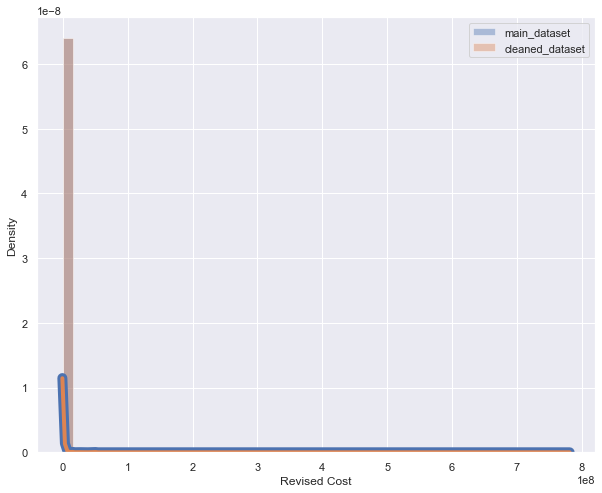

In [236]:
sns.distplot(data1['Revised Cost'],kde_kws={"lw":10},label='main_dataset')
sns.distplot(clean_df['Revised Cost'],kde_kws={"lw":4},label='cleaned_dataset')
plt.legend()

In [233]:
data1[data1['Revised Cost']==0].shape

(8513, 43)

In [234]:
data1['Revised Cost'].value_counts()

1.0          47228
0.0           8513
10000.0       5474
5000.0        5453
20000.0       4696
             ...  
1570800.0        1
239337.0         1
6627.0           1
7744.0           1
6996.0           1
Name: Revised Cost, Length: 12629, dtype: int64

# next method start

In [2]:
data1=pd.read_csv('Building_Permits.csv')
data1.head(2)

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718


In [12]:
cadt_var=data1.select_dtypes(include=['O'])
cadt_var.shape

(198900, 28)

In [13]:
cat_var=data1.select_dtypes(include=['O'])
cat=cat_var.isnull().sum()/cat_var.shape[0]*100
drop_col=cat_var.drop(columns=cat[cat>21].keys())
drop_col.shape

(198900, 16)

In [15]:
num_var=data1.select_dtypes(include=['int64','float64'])
num=num_var.isnull().sum()/cat_var.shape[0]*100
drop_col_num=num_var.drop(columns=num[num>21].keys())
drop_col_num.shape

(198900, 8)

In [17]:
drop_col.head(2)

,Permit Number,Permit Type Definition,Permit Creation Date,Block,Lot,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Existing Use,Neighborhoods - Analysis Boundaries,Location
0,201505065519,sign - erect,05/06/2015,0326,023,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,tourist hotel/motel,Tenderloin,"(37.785719256680785, -122.40852313194863)"
1,201604195146,sign - erect,04/19/2016,0306,007,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,tourist hotel/motel,Tenderloin,"(37.78733980600732, -122.41063199757738)"


In [18]:
drop_col_num.head(3)

,Permit Type,Street Number,Estimated Cost,Revised Cost,Plansets,Supervisor District,Zipcode,Record ID
0,4,140,4000.0,4000.0,2.0,3.0,94102.0,1380611233945
1,4,440,1.0,500.0,2.0,3.0,94102.0,1420164406718
2,3,1647,20000.0,NaN,2.0,3.0,94109.0,1424856504716


In [25]:
drop_col.isnull().sum()/drop_col.shape[0]*100

Permit Number                           0.000000
Permit Type Definition                  0.000000
Permit Creation Date                    0.000000
Block                                   0.000000
Lot                                     0.000000
Street Name                             0.000000
Street Suffix                           1.391654
Description                             0.145802
Current Status                          0.000000
Current Status Date                     0.000000
Filed Date                              0.000000
Issued Date                             7.511312
First Construction Document Date        7.514329
Existing Use                           20.670689
Neighborhoods - Analysis Boundaries     0.867270
Location                                0.854701
dtype: float64

In [24]:
drop_col_num.isnull().mean()*100

Permit Type             0.000000
Street Number           0.000000
Estimated Cost         19.138260
Revised Cost            3.049774
Plansets               18.757667
Supervisor District     0.863248
Zipcode                 0.862745
Record ID               0.000000
dtype: float64

In [40]:
cat_name=[]
for i in drop_col.keys():
    cat_name.append(i)
# cat_name
cat_name2_mode=['Permit Number',
 'Permit Type Definition',
 'Permit Creation Date',
 'Block',
 'Lot',
 'Street Name',
 'Street Suffix',
 'Description',
 'Current Status',
 'Current Status Date',
 'Filed Date',
 'Issued Date',
 'First Construction Document Date','Neighborhoods - Analysis Boundaries',
 'Location']


In [34]:
cat_constant=[var for var in cat_name if var=='Existing Use']
cat_constant

['Existing Use']

In [31]:
num_median_name=[]
num_mean_name=[]
for i,var in enumerate(drop_col_num.keys()):
    if i ==2 :
        num_median_name.append(var)
    elif i==4:
        num_median_name.append(var)
    else:
        num_mean_name.append(var)
print(num_median_name)
print(num_mean_name)

['Estimated Cost', 'Plansets']
['Permit Type', 'Street Number', 'Revised Cost', 'Supervisor District', 'Zipcode', 'Record ID']


In [42]:
print(num_mean_name)
print()
print(num_median_name)
print()
print(cat_name2_mode)
print()
print(cat_constant)

['Permit Type', 'Street Number', 'Revised Cost', 'Supervisor District', 'Zipcode', 'Record ID']

['Estimated Cost', 'Plansets']

['Permit Number', 'Permit Type Definition', 'Permit Creation Date', 'Block', 'Lot', 'Street Name', 'Street Suffix', 'Description', 'Current Status', 'Current Status Date', 'Filed Date', 'Issued Date', 'First Construction Document Date', 'Neighborhoods - Analysis Boundaries', 'Location']

['Existing Use']


# pipeline create

In [96]:
num_mean_name_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])
num_median_name_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median'))])
cat_name2_mode_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])
cat_constant_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing'))])


In [97]:
obj=ColumnTransformer(transformers=[('mean_imputer',num_mean_name_imputer,num_mean_name),
                                   ('median_imputer',num_median_name_imputer,num_median_name),
                                   ('mode_imputer',cat_name2_mode_imputer,cat_name2_mode),
                                   ('constant_imputer',cat_constant_imputer,cat_constant)])

In [98]:
obj.transform

<bound method ColumnTransformer.transform of ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Permit Type', 'Street Number',
                                  'Revised Cost', 'Supervisor District',
                                  'Zipcode', 'Record ID']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Estimated Cost', 'Plansets']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(s...
                                 ['Permit Number', 'Permit Type Definition',
                                  'Permit Creation Date', 'Block', 'Lot',
                               

In [99]:
obj.fit(data1)

ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Permit Type', 'Street Number',
                                  'Revised Cost', 'Supervisor District',
                                  'Zipcode', 'Record ID']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Estimated Cost', 'Plansets']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(s...
                                 ['Permit Number', 'Permit Type Definition',
                                  'Permit Creation Date', 'Block', 'Lot',
                                  'Street Name', 'Street Suffix', 'Descripti

In [100]:
obj.named_transformers_['median_imputer'].named_steps['imputer'].statistics_

array([1.1e+04, 2.0e+00])

In [101]:
obj.named_transformers_['mean_imputer'].named_steps['imputer'].statistics_

array([7.52232278e+00, 1.12172894e+03, 1.32856186e+05, 5.53840341e+00,
       9.41155006e+04, 1.16204758e+12])

In [102]:
obj.named_transformers_['mode_imputer'].named_steps['imputer'].statistics_

array(['201602179765', 'otc alterations permit', '09/15/2017', '3708',
       '001', 'Market', 'St', 'street space', 'complete', '09/15/2017',
       '09/15/2017', '06/15/2016', '11/07/2016',
       'Financial District/South Beach',
       '(37.79226164705184, -122.4034859571375)'], dtype=object)

In [103]:
obj.named_transformers_['constant_imputer'].named_steps['imputer'].statistics_

array(['missing'], dtype=object)

In [104]:
cleand_data_in_ndarray_fmt=obj.transform(data1)      #this is my value that are calculted
cleand_data_in_ndarray_fmt

array([[4.0, 140.0, 4000.0, ..., 'Tenderloin',
        '(37.785719256680785, -122.40852313194863)',
        'tourist hotel/motel'],
       [4.0, 440.0, 500.0, ..., 'Tenderloin',
        '(37.78733980600732, -122.41063199757738)',
        'tourist hotel/motel'],
       [3.0, 1647.0, 132856.1864917494, ..., 'Russian Hill',
        '(37.7946573324287, -122.42232562979227)', 'retail sales'],
       ...,
       [8.0, 1568.0, 1.0, ..., 'Financial District/South Beach',
        '(37.79226164705184, -122.4034859571375)', 'missing'],
       [8.0, 795.0, 1.0, ..., 'Financial District/South Beach',
        '(37.79226164705184, -122.4034859571375)', 'missing'],
       [8.0, 838.0, 1.0, ..., 'Financial District/South Beach',
        '(37.79226164705184, -122.4034859571375)', 'missing']],
      dtype=object)

In [105]:
obj.transform

<bound method ColumnTransformer.transform of ColumnTransformer(transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Permit Type', 'Street Number',
                                  'Revised Cost', 'Supervisor District',
                                  'Zipcode', 'Record ID']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Estimated Cost', 'Plansets']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(s...
                                 ['Permit Number', 'Permit Type Definition',
                                  'Permit Creation Date', 'Block', 'Lot',
                               

In [106]:
cleaned_data=pd.DataFrame(cleand_data_in_ndarray_fmt,columns=num_mean_name+num_median_name+cat_name2_mode+cat_constant)
cleaned_data.head()

,Permit Type,Street Number,Revised Cost,Supervisor District,Zipcode,Record ID,Estimated Cost,Plansets,Permit Number,Permit Type Definition,...,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Neighborhoods - Analysis Boundaries,Location,Existing Use
0,4.0,140.0,4000.0,3.0,94102.0,1380611233945.0,4000.0,2.0,201505065519,sign - erect,...,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,11/09/2015,Tenderloin,"(37.785719256680785, -122.40852313194863)",tourist hotel/motel
1,4.0,440.0,500.0,3.0,94102.0,1420164406718.0,1.0,2.0,201604195146,sign - erect,...,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,08/03/2017,Tenderloin,"(37.78733980600732, -122.41063199757738)",tourist hotel/motel
2,3.0,1647.0,132856.186492,3.0,94109.0,1424856504716.0,20000.0,2.0,201605278609,additions alterations or repairs,...,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,06/15/2016,11/07/2016,Russian Hill,"(37.7946573324287, -122.42232562979227)",retail sales
3,8.0,1230.0,2000.0,3.0,94109.0,1443574295566.0,2000.0,2.0,201611072166,otc alterations permit,...,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/18/2017,Nob Hill,"(37.79595867909168, -122.41557405519474)",1 family dwelling
4,6.0,950.0,100000.0,6.0,94102.0,144548169992.0,100000.0,2.0,201611283529,demolitions,...,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,11/20/2017,Tenderloin,"(37.78315261897309, -122.40950883997789)",retail sales


## remebered here remainder is by defulat 'drop' so some columns has been droped

In [66]:
print('shape of our original dataset :-',data1.shape)
print('shape of our clean dataset :-',cleaned_data.shape)
print('missing value in my dataset :-',cleaned_data.isnull().sum().sum())

shape of our original dataset :- (198900, 43)
shape of our clean dataset :- (198900, 24)
missing value in my dataset :- 0


## and now we will again follow all instruction in remainder "passthrough"

In [77]:
num_mean_name_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='mean'))])
num_median_name_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median'))])
cat_name2_mode_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent'))])
cat_constant_imputer=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='missing'))])

In [78]:
obj=ColumnTransformer(transformers=[('mean_imputer',num_mean_name_imputer,num_mean_name),
                                   ('median_imputer',num_median_name_imputer,num_median_name),
                                   ('mode_imputer',cat_name2_mode_imputer,cat_name2_mode),
                                   ('constant_imputer',cat_constant_imputer,cat_constant)],remainder='passthrough')

In [79]:
obj.fit(data1)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Permit Type', 'Street Number',
                                  'Revised Cost', 'Supervisor District',
                                  'Zipcode', 'Record ID']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Estimated Cost', 'Plansets']),
                                ('mode_imputer',
                                 Pipeline(steps=[('...
                                 ['Permit Number', 'Permit Type Definition',
                                  'Permit Creation Date', 'Block', 'Lot',
                                  'Street Name', 'Street Suffix', 'Description',
                           

In [80]:
obj.transform

<bound method ColumnTransformer.transform of ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['Permit Type', 'Street Number',
                                  'Revised Cost', 'Supervisor District',
                                  'Zipcode', 'Record ID']),
                                ('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['Estimated Cost', 'Plansets']),
                                ('mode_imputer',
                                 Pipeline(steps=[('...
                                 ['Permit Number', 'Permit Type Definition',
                                  'Permit Creation Date', 'Block', 'Lot',
                                  'Street Name', 'Street Suffix

In [115]:
valuess=obj.transform(data1)
valuess

array([[4.0, 140.0, 4000.0, ..., 'Tenderloin',
        '(37.785719256680785, -122.40852313194863)',
        'tourist hotel/motel'],
       [4.0, 440.0, 500.0, ..., 'Tenderloin',
        '(37.78733980600732, -122.41063199757738)',
        'tourist hotel/motel'],
       [3.0, 1647.0, 132856.1864917494, ..., 'Russian Hill',
        '(37.7946573324287, -122.42232562979227)', 'retail sales'],
       ...,
       [8.0, 1568.0, 1.0, ..., 'Financial District/South Beach',
        '(37.79226164705184, -122.4034859571375)', 'missing'],
       [8.0, 795.0, 1.0, ..., 'Financial District/South Beach',
        '(37.79226164705184, -122.4034859571375)', 'missing'],
       [8.0, 838.0, 1.0, ..., 'Financial District/South Beach',
        '(37.79226164705184, -122.4034859571375)', 'missing']],
      dtype=object)

In [121]:
print('shape of our cleaned dataset with reminder passthrough :-',valuess.shape)
nl=data1.isnull().sum()/data1.shape[0]*100
nam=nl[nl<21].keys()
print()
print('these are all my names that cleaned in this process :-')
print()
print(nam)

shape of our cleaned dataset with reminder passthrough :- (198900, 24)

these are all my names that cleaned in this process :-

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number', 'Street Name',
       'Street Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'First Construction Document Date',
       'Estimated Cost', 'Revised Cost', 'Existing Use', 'Plansets',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
      dtype='object')


In [139]:
data1[nam]=valuess

# i did it i am very happy 

In [149]:
data1[nam].isnull().sum().sum()

0

In [150]:
# here i am removing all that columns that contains maximum 21% missing value
# i has to againg doing becouse we did,nt use the inplace 
clean=data1.dropna(axis=1)
clean.isnull().sum().sum()

0

In [151]:
clean.shape

(198900, 24)

In [152]:
clean.isnull().sum()

Permit Number                          0
Permit Type                            0
Permit Type Definition                 0
Permit Creation Date                   0
Block                                  0
Lot                                    0
Street Number                          0
Street Name                            0
Street Suffix                          0
Description                            0
Current Status                         0
Current Status Date                    0
Filed Date                             0
Issued Date                            0
First Construction Document Date       0
Estimated Cost                         0
Revised Cost                           0
Existing Use                           0
Plansets                               0
Supervisor District                    0
Neighborhoods - Analysis Boundaries    0
Zipcode                                0
Location                               0
Record ID                              0
dtype: int64

## process finshed

In [ ]:
# prectise esercise becaouse i am confuse


In [123]:
rahul=pd.DataFrame(np.arange(1,51).reshape(10,5),columns=['col'+str(i) for i in range(1,6) ])
rahul.head()

,col1,col2,col3,col4,col5
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15
3,16,17,18,19,20
4,21,22,23,24,25


In [127]:
t=pd.Series([i for i in range(10,21)])
t

0     10
1     11
2     12
3     13
4     14
5     15
6     16
7     17
8     18
9     19
10    20
dtype: int64

In [131]:
u=pd.Series([i for i in range(21,31)])
u

0    21
1    22
2    23
3    24
4    25
5    26
6    27
7    28
8    29
9    30
dtype: int64

In [134]:
rahul[['col1','col2']]=t,u

c:\users\dell\appdata\local\programs\python\python39\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


In [135]:
rahul[['col1','col2']]

,col1,col2
0,10,21
1,11,22
2,12,23
3,13,24
4,14,25
5,15,26
6,16,27
7,17,28
8,18,29
9,19,30
